# **Customer Lifetime Value**

[Sumber Data Set](https://drive.google.com/file/d/1pYhQb2WcbwLAaMF4FPIEJSM34O-1A4v8/view?usp=sharing)

## **Content**
1. Business Understanding
2. Data Preprocessing
3. Data Understanding
4. Modeling
5. Conclusion
6. Recommendation

---

## **1. Business Understanding**
Ada perusahaan asuransi yang mempunyai nama Alias. Mereka ingin mengetahui tipikal pelanggan yang cocok untuk ditawari sebuah asuransi berdasarkan *Customer Lifetime Value* mereka. Beberapa faktor yang bisa mengindikasi mempengaruhi nilai tersebut diantaranya jenis mobil, status pernikahan, status pekerjaan, tingkat pendidikan, pendapatan, premi bulanan, dan jumlah claim. 

### Problem Statement
Dari beberapa klasifikasi berikut, perusahaan asuransi ingin mempertahankan beberapa pelanggan yang memiliki nilai tinggi (*high customer lifetime value*). Walaupun mereka mempunyai penawaran dengan berbagai tipe cakupan dan promosi perpanjangan (renewal offers), banyak diantara mereka yang memilih opsi untuk tidak melanjutkan polis mereka.

**Bagaimana mereka dapat mengidentifikasi profil pelanggan dengan CLV tinggi dan menyusun strategi yang tepat untuk meningkatkan loyalitas mereka?**

### Goals
Tujuan utama dari proyek ini adalah untuk membantu perusahaan asuransi memahami dan memaksimalkan nilai pelanggan mereka melalui analisis data Customer Lifetime Value (CLV). Dengan menggali faktor-faktor yang paling memengaruhi CLV seperti jenis kendaraan, status pekerjaan, tingkat pendidikan, jumlah polis, dan total klaim—perusahaan dapat mengidentifikasi pola dan karakteristik pelanggan yang memiliki potensi nilai jangka panjang.

## **2. Data Preprocessing**
Pada tahapan ini dilakukan data cleansing yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis. Beberapa yang dilakukan adalah:
- Melakukan treatment terhadap missing value, berupa drop data atau isi data dengan mean
- Melakukan treatment terhadap duplikasi data.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data_customer_lifetime_value.csv")
df = pd.DataFrame(data)
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [31]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dari hasil summary diatas, tidak terdapat missing value yang ditemukan di berbagai kolom yang ada di dataset.

In [32]:
df[df.duplicated()]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Offer1,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Offer2,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Offer2,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Offer2,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


In [33]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [34]:
df[(df['Vehicle Class'] =='Sports Car') & (df['Coverage'] == 'Basic') & (df['Renew Offer Type'] == 'Offer2')
   & (df['Marital Status'] == 'Married') & (df['Education'] == 'High School or Below') & 
   (df['EmploymentStatus'] == 'Unemployed') & (df['Number of Policies'] == 3.0) & (df['Monthly Premium Auto'] == 119.0)]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
182,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447
2105,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447
5026,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447


Setelah mengetahui bukti adanya duplikasi data, beberapa data yang duplikat didrop 

In [35]:
df = df.drop_duplicates()

In [36]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


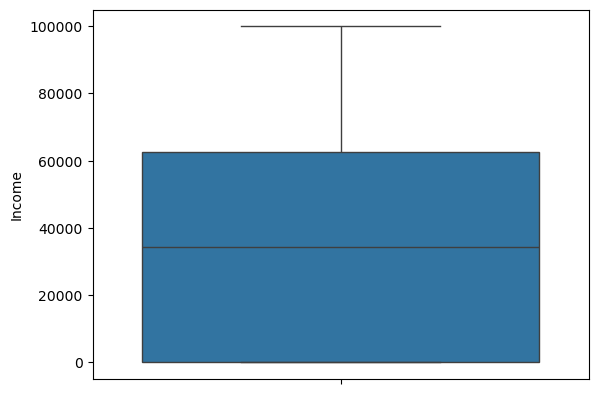

In [54]:
sns.boxplot(data=df['Income'])
plt.show()

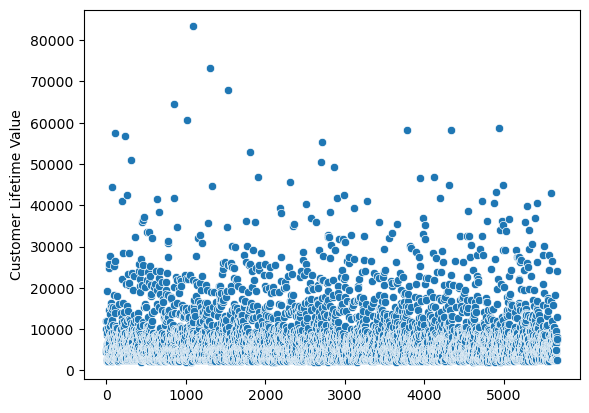

In [70]:
sns.scatterplot(data=df['Customer Lifetime Value'])
plt.show()

## **3. Data Understanding**

- Dataset merupakan data hasil CLV dengan segala jenis fiturnya

### Atribut Information

| Kolom                    | Tipe Data | Deskripsi                                                                          |
|--------------------------|-----------|-------------------------------------------------------------------------------------|
| Vehicle Class            | Categorical (object) | Jenis kendaraan pelanggan (misal: Four-Door Car, SUV)                             |
| Coverage                 | Categorical (object) | Tingkat cakupan asuransi (Basic, Extended, Premium)                               |
| Renew Offer Type         | Categorical (object) | Jenis penawaran ulang yang diberikan kepada pelanggan                              |
| EmploymentStatus         | Categorical (object) | Status pekerjaan pelanggan (Employed, Retired, etc.)                               |
| Marital Status           | Categorical (object) | Status pernikahan pelanggan                                                        |
| Education                | Categorical (object) | Tingkat pendidikan pelanggan                                                       |
| Number of Policies       | Numerical (float64)   | Jumlah polis aktif yang dimiliki pelanggan                                         |
| Monthly Premium Auto     | Numerical (float64)   | Jumlah premi asuransi mobil yang dibayarkan setiap bulan                           |
| Total Claim Amount       | Numerical (float64)   | Total klaim yang pernah diajukan oleh pelanggan                                    |
| Income                   | Numerical (float64)   | Pendapatan tahunan pelanggan                                                       |
| Customer Lifetime Value  | Numerical (float64)   | Perkiraan nilai total pelanggan bagi perusahaan selama hubungan berlangsung        |

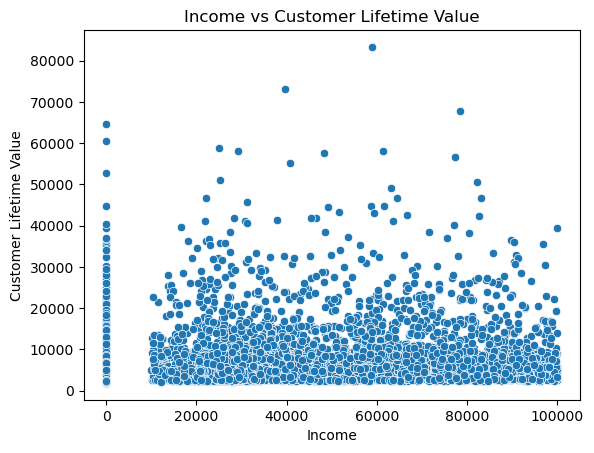

In [38]:
sns.scatterplot(data=df, x='Income', y='Customer Lifetime Value',)
plt.title('Income vs Customer Lifetime Value')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

Dari data diatas, income tidak memiliki pengaruh besar terhadap customer lifetime value. Karena tidak ada income namun bisa memiliki customer lifetime value yang sangat tinggi (~65000) dan tinggi income hanya mencapai customer lifetime value di nilai ~40000

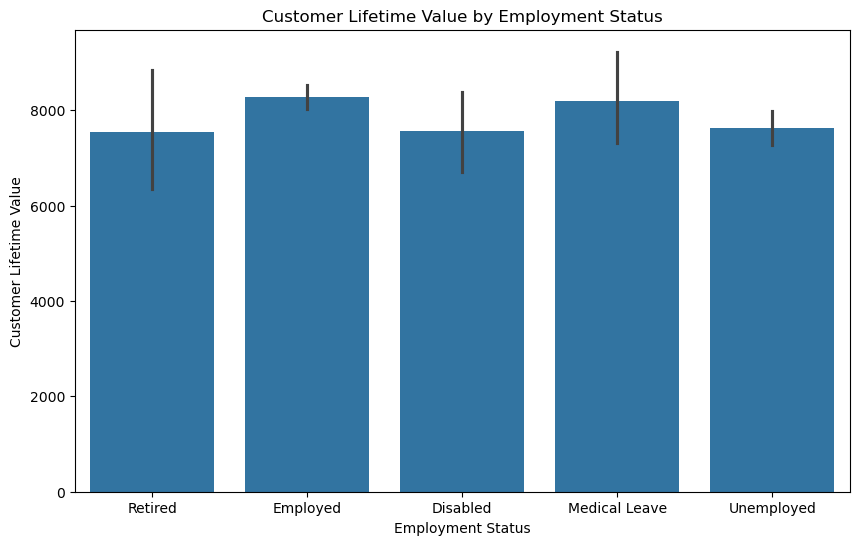

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="EmploymentStatus", y="Customer Lifetime Value")
plt.title('Customer Lifetime Value by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Customer Lifetime Value')
plt.show()

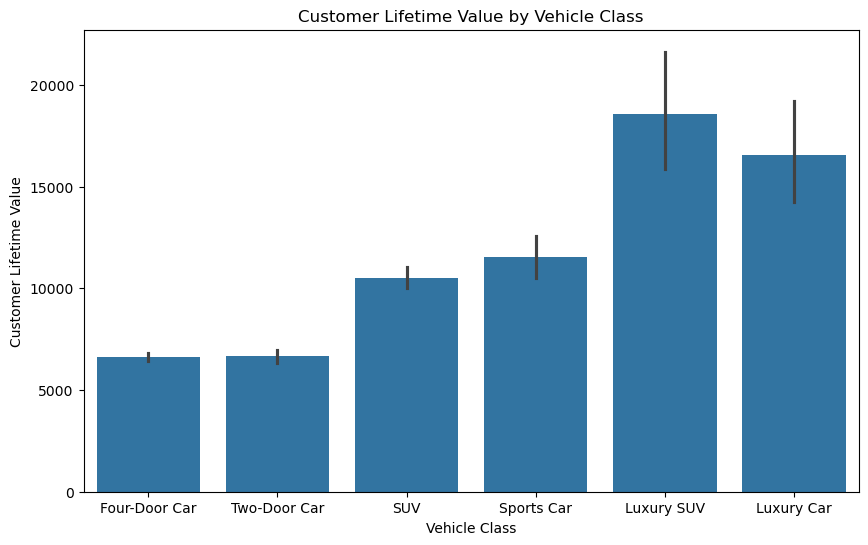

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vehicle Class', y='Customer Lifetime Value')
plt.title('Customer Lifetime Value by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

Dari barplot diatas, dapat disimpulkan bahwa semakin tinggi kendaraan yang dimiliki oleh customer, maka mempengaruhi nilai customer lifetime value. 

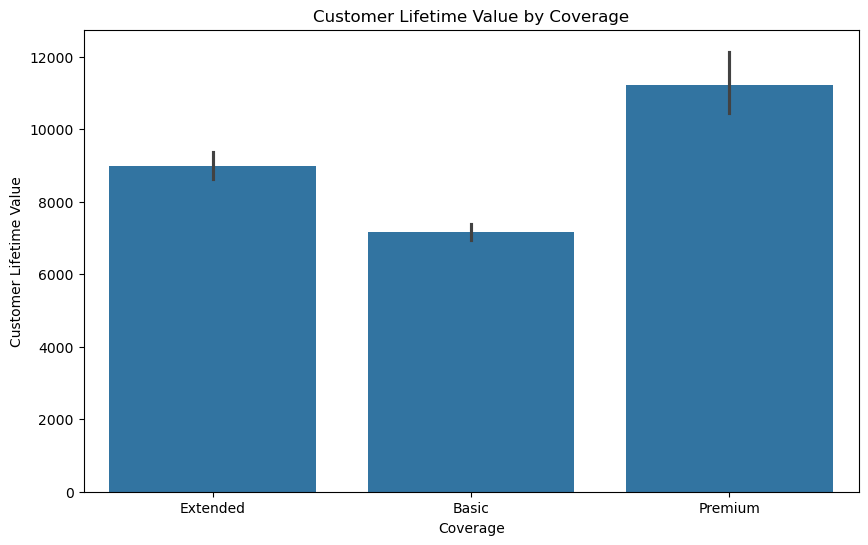

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Coverage', y='Customer Lifetime Value')
plt.title('Customer Lifetime Value by Coverage')
plt.xlabel('Coverage')
plt.ylabel('Customer Lifetime Value')
plt.show()

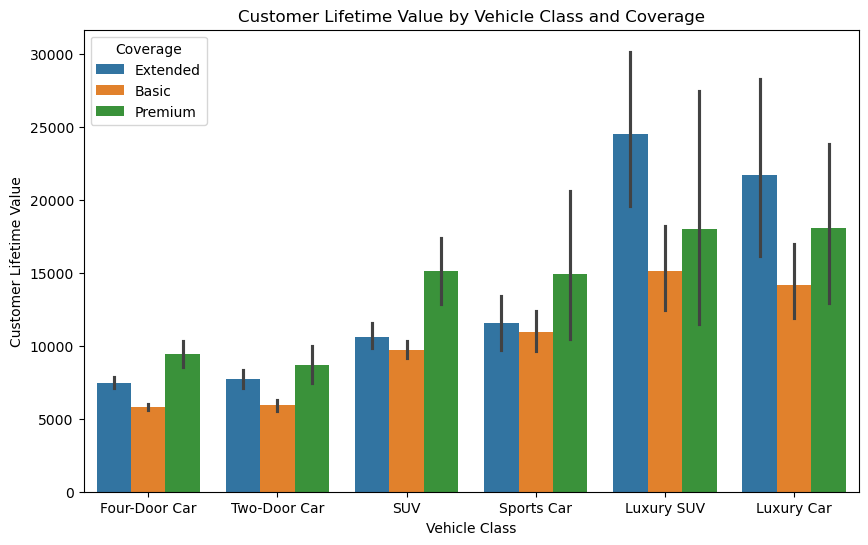

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vehicle Class', y='Customer Lifetime Value', hue="Coverage")
plt.title('Customer Lifetime Value by Vehicle Class and Coverage')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

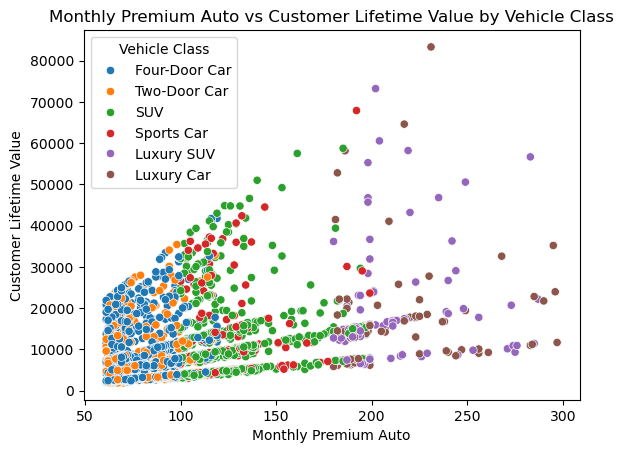

In [43]:
sns.scatterplot(data=df, x='Monthly Premium Auto', y='Customer Lifetime Value', hue='Vehicle Class')
plt.title('Monthly Premium Auto vs Customer Lifetime Value by Vehicle Class')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.show()

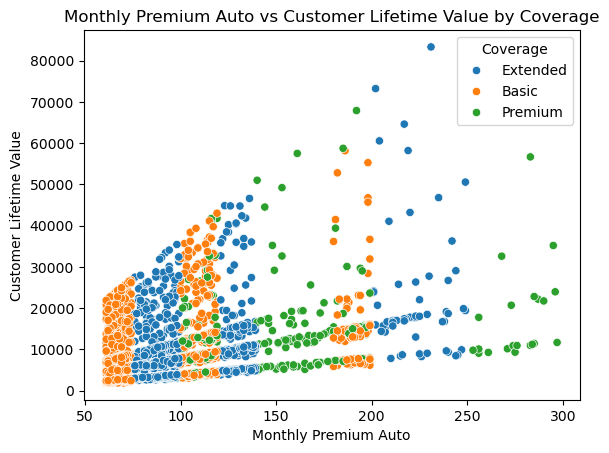

In [44]:
sns.scatterplot(data=df, x='Monthly Premium Auto', y='Customer Lifetime Value', hue='Coverage')
plt.title('Monthly Premium Auto vs Customer Lifetime Value by Coverage')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.show()

Scatterplot diatas ini mengindikasikan bahwa monthly premium auto dan coverage adalah faktor penting yang berkontribusi terhadap nilai jangka panjang pelanggan. Pelanggan dengan pertanggungan yang lebih komprehensif (Extended dan Premium) cenderung memiliki nilai yang lebih tinggi, dan semakin tinggi monthly premium auto mereka, semakin tinggi pula potensi nilai jangka panjang mereka.

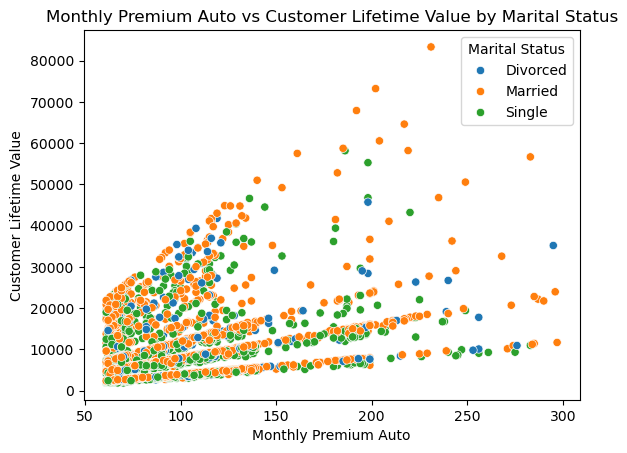

In [45]:
sns.scatterplot(data=df, x='Monthly Premium Auto', y='Customer Lifetime Value', hue='Marital Status')
plt.title('Monthly Premium Auto vs Customer Lifetime Value by Marital Status')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.show()

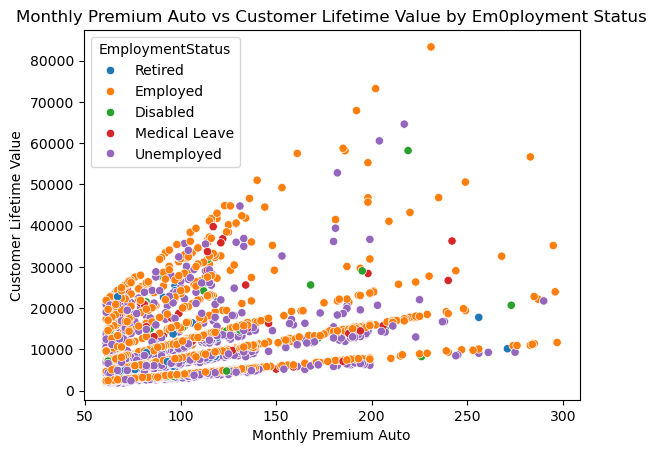

In [ ]:
sns.scatterplot(data=df, x='Monthly Premium Auto', y='Customer Lifetime Value', hue='EmploymentStatus')
plt.title('Monthly Premium Auto vs Customer Lifetime Value by Employment Status')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.show()

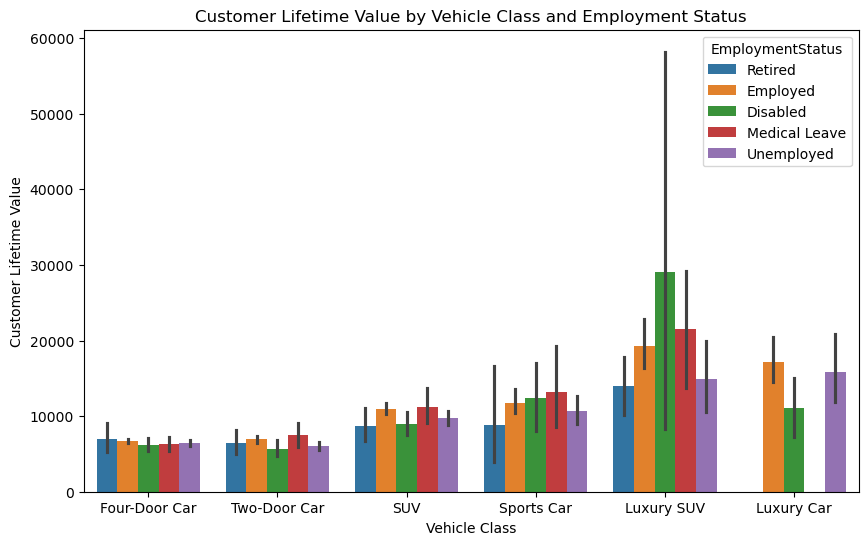

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vehicle Class', y='Customer Lifetime Value', hue="EmploymentStatus")
plt.title('Customer Lifetime Value by Vehicle Class and Employment Status')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

In [48]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


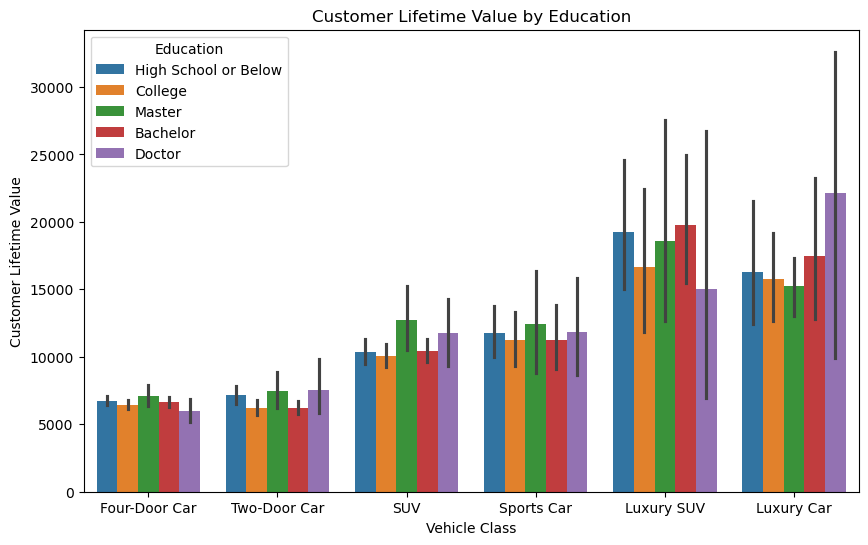

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Vehicle Class', y='Customer Lifetime Value', hue="Education")
plt.title('Customer Lifetime Value by Education')
plt.xlabel('Vehicle Class')
plt.ylabel('Customer Lifetime Value')
plt.show()

Kesimpulan yang didapat, Customer Lifetime Value akan berpengaruh dengan vehicle class, monthly premium auto dan coverage yang dimiliki oleh customer. Semakin tinggi CLV yang dimiliki, semakin tinggi jenis kendaraannya, semakin besar coverage asuransinya dan semakin besar juga monthly premium auto.

### **4. Data Modelling**

**Random Forest Regression**

In [57]:
from sklearn.preprocessing import LabelEncoder

df01 = df.copy()
le = LabelEncoder()
df01['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df01['Coverage'] = le.fit_transform(df['Coverage'])
df01['Marital Status'] = le.fit_transform(df['Marital Status'])
df01['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])
df01['Renew Offer Type'] = le.fit_transform(df['Renew Offer Type'])
df01['Education'] = le.fit_transform(df['Education'])

df01.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0,1,0,3,0,3,2.0,90.0,571.479602,11828.0,10083.486880
1,0,0,0,1,1,1,6.0,62.0,114.514440,44762.0,4943.386117
2,5,0,0,3,1,4,2.0,62.0,257.248789,21514.0,11981.984810
3,0,2,2,0,1,3,1.0,116.0,556.800000,17913.0,4550.856045
4,5,0,2,2,1,3,1.0,62.0,355.820799,19030.0,2372.155492


In [58]:
from sklearn.model_selection import train_test_split

X = df01.drop(columns=['Customer Lifetime Value'])
y = df01['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")

MAE: 1611.1491954966832
MSE: 15971154.008530796
R2: 0.6644505321718646


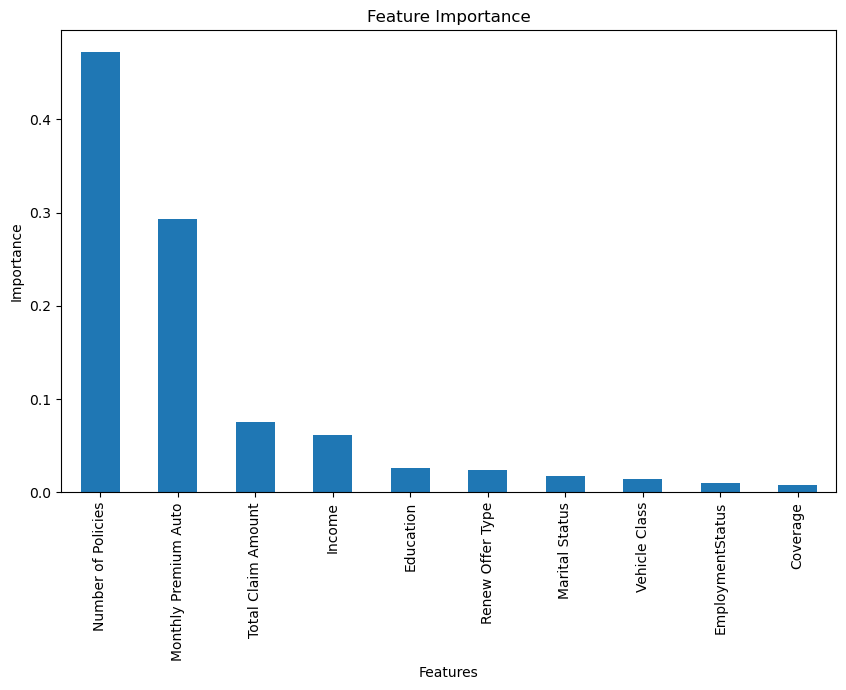

In [69]:
features_importance = pd.Series(model.feature_importances_, index=X_train.columns)
features_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

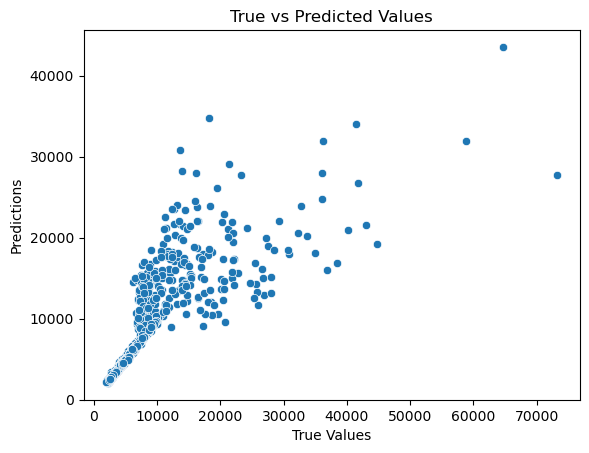

In [62]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


Model yang dibangun menggunakan algoritma Random Forest Regressor mampu memprediksi nilai Customer Lifetime Value (CLV) dengan performa yang cukup baik. Berdasarkan metrik evaluasi:

R² Score sebesar 0.66 menunjukkan bahwa model dapat menjelaskan sekitar 66% variasi nilai CLV dari pelanggan berdasarkan fitur-fitur yang digunakan, seperti tipe kendaraan, coverage asuransi, dan monthly premium auto.

Nilai MAE (Mean Absolute Error) yang rendah (sekitar 1.600) menunjukkan bahwa secara rata-rata, prediksi model hanya meleset sekitar 1.600 poin dari nilai asli.

Visualisasi scatter plot antara nilai asli dan prediksi menunjukkan bahwa model bekerja cukup akurat untuk CLV rendah hingga menengah, meskipun masih ada beberapa error pada pelanggan dengan CLV yang sangat tinggi.

Dari analisis ini, dapat disimpulkan bahwa model dapat digunakan untuk memberikan estimasi nilai pelanggan secara umum, terutama untuk membantu perusahaan mengidentifikasi pelanggan bernilai tinggi berdasarkan data awal mereka.

Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [64]:
MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
R2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")

MAE: 3857.376857767963
MSE: 39859880.01299855
R2: 0.16255509658782796


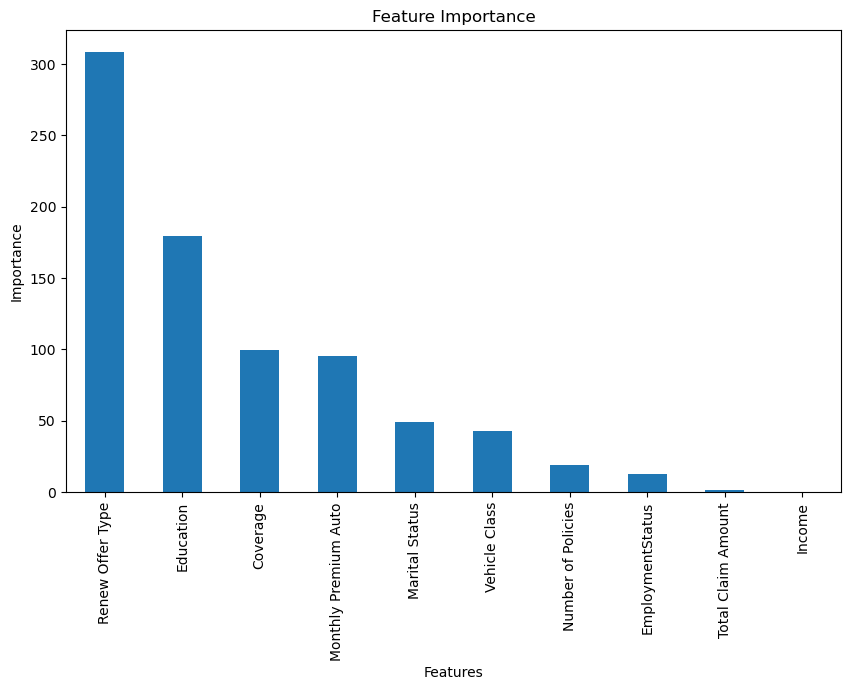

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_importance = pd.Series(abs(lr_model.coef_), index=X_train.columns)
features_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

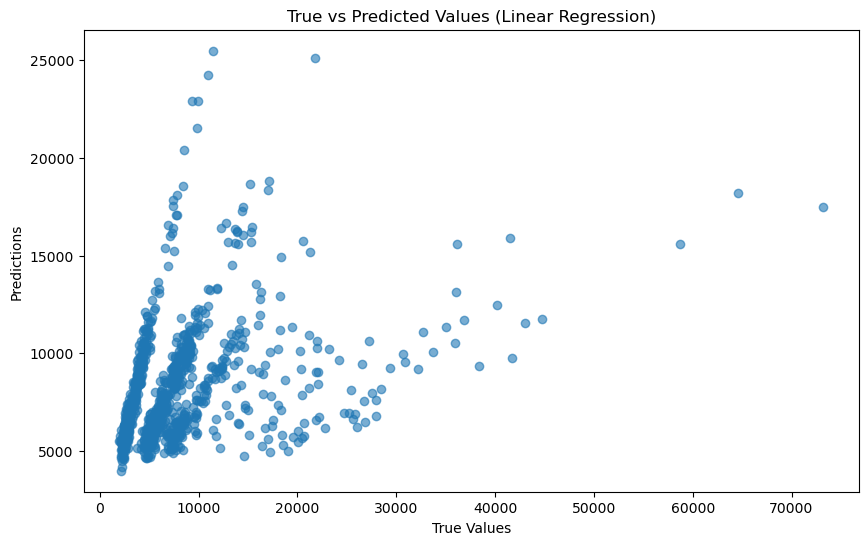

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Linear Regression)')
plt.show()

Berdasarkan hasil pemodelan menggunakan algoritma Linear Regression, diketahui bahwa model ini mampu memprediksi nilai Customer Lifetime Value (CLV) dengan cukup baik untuk pelanggan dengan nilai CLV rendah hingga menengah. Namun, performanya menurun pada pelanggan dengan CLV tinggi, di mana model cenderung menghasilkan prediksi yang lebih rendah dari nilai sebenarnya (underestimate). Hal ini disebabkan oleh keterbatasan model linier yang hanya mampu menangkap hubungan linear antara fitur dan target, padahal dalam kasus ini, hubungan tersebut tampaknya lebih kompleks dan non-linear. Terlihat dari visualisasi scatter plot bahwa prediksi tersebar padat dan vertikal di beberapa titik, menunjukkan bahwa model tidak cukup sensitif terhadap variasi fitur dalam kelompok tersebut. Bila dibandingkan dengan Random Forest, model Linear Regression memiliki akurasi yang lebih rendah dan kurang fleksibel dalam menangani data yang lebih kompleks. Oleh karena itu, meskipun Linear Regression cocok sebagai baseline model, model berbasis pohon keputusan seperti Random Forest lebih direkomendasikan untuk prediksi CLV karena mampu memberikan hasil yang lebih akurat dan stabil.

## **5. Conclusion**

Berdasarkan hasil pemodelan dengan Linear Regression dan Random Forest, dapat disimpulkan bahwa Random Forest secara signifikan lebih unggul dalam memprediksi Customer Lifetime Value (CLV) dibandingkan dengan Linear Regression.

**Linear Regression**: Meskipun mampu memberikan prediksi yang cukup baik untuk pelanggan dengan CLV rendah hingga menengah, model ini menunjukkan keterbatasan dalam menangani pelanggan dengan CLV tinggi, cenderung melakukan underestimate. Hal ini mengindikasikan bahwa hubungan antara fitur dan CLV kemungkinan besar bersifat non-linear, yang tidak dapat sepenuhnya ditangkap oleh model linier. Akurasi Linear Regression secara keseluruhan juga lebih rendah dibandingkan Random Forest.

**Random Forest**: Model ini menunjukkan performa yang lebih baik secara keseluruhan, dengan R² Score sebesar 0.66 yang menandakan kemampuan menjelaskan variasi CLV yang lebih tinggi. Nilai MAE yang rendah menunjukkan kesalahan prediksi rata-rata yang relatif kecil. Meskipun visualisasi scatter plot menunjukkan akurasi yang baik untuk CLV rendah hingga menengah, terdapat indikasi bahwa model masih mengalami kesulitan dalam memprediksi nilai CLV yang sangat tinggi.

**Analisis Ketidakseimbangan Data:**

Keterbatasan kedua model dalam memprediksi nilai CLV yang sangat tinggi kemungkinan besar disebabkan oleh ketidakseimbangan data. Anda mengamati bahwa data pelanggan cenderung menumpuk pada nilai CLV yang rendah (< 30000), sementara jumlah pelanggan dengan nilai CLV yang tinggi jauh lebih sedikit.

**Implikasi Ketidakseimbangan Data:**

Model, terutama Random Forest, mungkin menjadi lebih baik dalam mempelajari pola dan karakteristik pelanggan dengan CLV rendah karena representasi data yang lebih banyak.
Kurangnya data untuk pelanggan dengan CLV tinggi dapat menyebabkan model kurang sensitif terhadap fitur-fitur yang membedakan kelompok ini, sehingga menghasilkan prediksi yang kurang akurat.
Metrik evaluasi seperti R² dan MAE mungkin didominasi oleh performa model pada mayoritas data (CLV rendah), sehingga kurang mencerminkan performa sebenarnya pada minoritas data (CLV tinggi).

## **6. Recommendation**

Untuk meningkatkan performa prediksi CLV, terutama untuk pelanggan dengan nilai tinggi, beberapa strategi dapat dipertimbangkan untuk mengatasi ketidakseimbangan data:

- Oversampling Data CLV Tinggi: Teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) dapat digunakan untuk menghasilkan sampel sintetis dari pelanggan dengan CLV tinggi, sehingga menyeimbangkan distribusi kelas target.
- Undersampling Data CLV Rendah: Mengurangi jumlah sampel dari pelanggan dengan CLV rendah secara acak. Namun hati-hati agar tidak menghilangkan informasi penting.
- Algoritma yang Sensitif terhadap Ketidakseimbangan: Menggunakan algoritma yang secara inheren lebih baik dalam menangani data yang tidak seimbang atau menyesuaikan bobot kelas selama pelatihan.
- Evaluasi yang Lebih Fokus pada CLV Tinggi: Menggunakan metrik evaluasi yang lebih sensitif terhadap performa pada kelas minoritas (CLV tinggi), seperti Precision, Recall, atau F1-Score yang difokuskan pada kelompok CLV tinggi.
- Pengumpulan Data Lebih Lanjut: Jika memungkinkan, mengumpulkan lebih banyak data pelanggan dengan nilai CLV yang tinggi dapat secara signifikan meningkatkan kemampuan model untuk mempelajari karakteristik kelompok ini.

In [71]:
import pickle
with open('model_random_forest.pkl', 'wb') as file:
    pickle.dump(model, file)

In [72]:
with open('model_linear_regression.pkl', 'wb') as file:
    pickle.dump(lr_model, file)